# Data Literacy Exercise 06

Machine Learning in Science, University of Tübingen, Winter Semester 2022

## Theory Questions

### EXAMple question

a) True. We want to show, that there iss actually an underlying difference. For this we assume to there be no difference, in order to be able to reject the null-Hypothesis.

b) False. Firstly, the p-value can only be interpreted as a conditional probability, namely P( make Type I error | H_O is true). Second of all, the usual threshold for significance is lower (p=0.05).

c) False. We cannot prove anything. We simply know that assuming H_0, we are very unlikely to make a Type I error.

d) False. The p-value cannot tell us this. This is a probability that would have to be calculated separately.


### Theory Question

a) Assuming $x_1, ..., x_n \sim \mathcal{N}(\mu, \sigma^2)$, we can interpret $x_i$ as the outcome of the random variable $X_i$.

With $\sum X_i \sim \mathcal N(\sum \mu_{X_i}, \sum \sigma_{X_i}^2) and \alpha X \sim \mathcal N(\alpha \mu, \alpha^2 \sigma^2)$ follows that, $T(X_1,..,X_N) = \frac{1}{N}\sum x_i \sim \mathcal N(\frac{1}{N} \sum \mu_{X_i}, \frac{1}{N^2} \sum \sigma_{X_i}^2) = N(\mu, \frac{1}{N} \sigma^2)$

b) Let $t = T(x) \sim \mathcal N(\mu, \frac{1}{N}\sigma^2)$.

Then let $\tilde t = \frac{t - \mu}{\frac{1}{\sqrt{N}}\sigma} \sim \mathcal N(0,1)$

We have

$\begin{align*}
P(t > q \vee t < -q) \overset{\mathcal N(0,1) symm.}{=}\hspace{0.55cm}& 2P(t > q)\\
&= 2(1 - P(t < q))\\
&= 2(1 - P(\frac{t - \mu}{\frac{1}{\sqrt{N}} \sigma} < \frac{q - \mu}{\frac{1}{\sqrt{N}} \sigma}))\\
&= 2(1 - \Phi(\frac{\sqrt{N}}{\sigma} \cdot (q - \mu)\\
\end{align*}$

c)

$\begin{align*}
\beta (\mu) &= 2(1 - \Phi(\frac{\sqrt{N}}{\sigma} \cdot (c_{\alpha} - \mu)))\\
&= 2(1 - \Phi(\frac{\sqrt{N}}{\sigma} \cdot (\frac{\sigma}{\sqrt{N}}\Phi^{-1}(1 - \frac{\alpha}{2}) - \mu))\\
&= 2(1 - \Phi(\Phi^{-1}(1 - \frac{\alpha}{2})  - \mu))\\
&\overset{\mu = 0}{=} 2(1 - 1 + \frac{\alpha}{2})\\
& 2 \frac{\alpha}{2}\\
&= \alpha
\end{align*}$

## Introduction

Permutation testing is a procedure which can be used to test whether there is an association between two random variables $Z$ and $Y$. Given a set of pairs $D={(z_1, y_1), (z_2, y_2), \ldots, (z_N, y_N)}$, we want to test whether $Z$ and $Y$ are statistically independent or not.

Permutation tests can be defined for different test statistics, but for example we can apply it to $T(D) = \sum_i (z_i-y_i)^2$. The beauty of the permutation test is that there is a very simple way to compute the distribution of the test statistic under the null hypothesis: If $z_i$ and $y_i$ are independent (which they are under $H_o$), then it should not matter whether we compute ($z_i - y_i$) or ($z_i - y_j$) for a $j$ which is drawn (uniformly) at random! One way to implement this is to simply permute the indices of the $y$’s, and to compute $T(D^*)$ on this permuted data set. By repeating this many times for different (uniformly) random permutations, we can thus compute a histogram of the test statistic under the null. Finally, we can then calculate the p-value by checking what fraction of the (permuted) statistic is smaller than the one we observed!

As a concrete example, let's apply this to a regression task. In this case, we assume we have some algorithm that computed predictions $z_i$, and we want to see whether these predictions are closer to the targets $y_i$ than one would expect under the null hypothesis, using the test statistic introduced above.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats.distributions

np.random.seed(42)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Predicting bike rentals from weather

### 1. Load our dataset

We will be using the [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) from University of Porto to predict the number of rental bikes from the weather (you can download the .csv from Ilias).

In [2]:
# Load csv data using the pandas library
df = pd.read_csv("bikedata.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Use the "temp" column as our features (X), and the "cnt" column for labels (y)
X = df['temp'].to_numpy()
y = df['cnt'].to_numpy()

### 2. Splitting into train and test sets

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Split the arrays into training and test sets, using 30% for test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

### 3. Linear regression

In [7]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to the data
reg = LinearRegression().fit(X_train, y_train)

In [8]:
from sklearn.metrics import mean_squared_error

# Generate a vector of predictions
y_pred = reg.predict(X_test)

# Calculate the mean squared error (you can use the sklearn method above for this)
mse = mean_squared_error(y_test, y_pred)

### 4. Implement permutation testing

Permutation testing is a procedure which allows us to measure how likely the observed metric (in this case, the mean squared error) is obtained by chance. In this case, a p-value represents the fraction of random data sets under a certain null hypothesis where the model performed as well as or better than our observed metric (which was obtained on the true labels).

Here, our null hypothesis ($H_0$) is that there is no difference between the performance of our trained model and chance (random guessing). To reject this hypothesis, we must create a null distribution, or a set of random (i.e. permuted, or shuffled) data sets. We then calculate our p-value by comparing the error between our observed predictions (calculated above) and the shuffled data (chance level, to be filled in below).

In [9]:
from numpy.random import shuffle

perm_scores = []

for i in np.arange(0, 1000):
    
    # Shuffle the labels
    np.random.shuffle(y_pred)
    
    # Calculate the MSE
    mse_perm = mean_squared_error(y_test, y_pred)
    
    # Append the MSE to perm_scores
    perm_scores.append(mse_perm)

### 5. Plot

Plot a histogram of the test statistic under the null hypothesis. Additionally, plot a vertical line for the value of the observed test statistic.

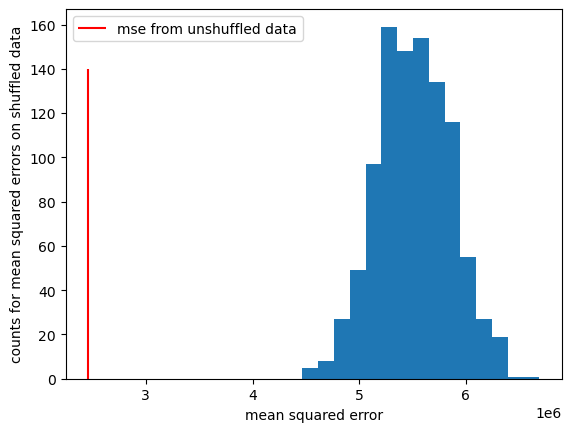

In [10]:
import matplotlib.pyplot as plt

plt.vlines(mse, ymin=0, ymax=140, colors=['r'], label='mse from unshuffled data')
plt.hist(perm_scores, bins=15)
plt.ylabel('counts for mean squared errors on shuffled data')
plt.xlabel('mean squared error')
plt.legend()


### 6. Calculate p-value

In [11]:
from scipy.stats import norm
# Calculate the p-value
# This will reflect the proportion of MSE from our permuted labels which are lower than or equal to the MSE on the true labels
mean = np.mean(perm_scores)
std = np.std(perm_scores)
p_val = 2*(1 - norm.cdf(np.sqrt(len(perm_scores)) / std * mse))

In [12]:
p_val

0.0

If you get a p-value of 0, this means that your observed MSE was better than random guessing across all permutations. You would report this by saying that your p-value is less than the minimum, i.e. $p<.001$ (since we do 1000 permutations).

### 6. Interpret your results

What statement can you make based on the p-value you obtained?

Assuming that H_0 is true, we have a chance of 0.1 % of making a Type I error.
Meaning that given our assumption that there is no dependance of the two datasets, it's very unlikely that random
shuffeling the data will yield a lower MSE.

A Type I Error is to wrongly reject the null hypothesis. Thus, given that we assumed no dependance between the two datasets,
we would be at low risk of rejecting H_0 wrongly.

(We note that permutation testing is often presented as a way to test whether there is a difference in distribution between two sets of observations (see e.g. Wasserman 10.5, or the [Wikipedia entry](https://en.wikipedia.org/wiki/Permutation_test). Permutation tests can be used for either the purpose described here or for testing for a difference between groups, and the two are indeed related.)

----------

## Predicting diabetes from a single feature

Similar to what you just did above, we will recreate the pipeline using different data.

### 1. Making our dataset

In [32]:
from sklearn import datasets

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 0]  # TO BE CHANGED LATER ON

### 2. Splitting into train and test sets

In [33]:
# Split the data into training/testing sets
# In this case we just take the last 20 samples for test
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

### 3. Linear regression

In [34]:
reg = LinearRegression().fit(diabetes_X_train, diabetes_y_train)

In [35]:
diabetes_y_pred = reg.predict(diabetes_X_test)
mse = mean_squared_error(diabetes_y_pred, diabetes_y_test)

### 4. Implement permutation testing

In [36]:
perm_scores = []

for i in np.arange(0, 1000):
    
    # Shuffle the labels
    np.random.shuffle(diabetes_y_pred)
    
    # Calculate the MSE
    mse_perm = mean_squared_error(diabetes_y_pred, diabetes_y_test)
    
    # Append the MSE to perm_scores
    perm_scores.append(mse_perm)

### 5. Plot

Plot a histogram of the test statistic under the null hypothesis. Additionally, plot a vertical line for the value of the observed test statistic.

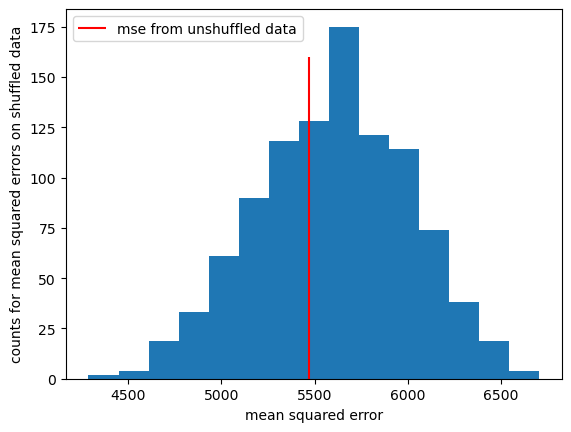

In [37]:
import matplotlib.pyplot as plt

plt.vlines(mse, ymin=0, ymax=160, colors=['r'], label='mse from unshuffled data')
plt.hist(perm_scores, bins=15)
plt.ylabel('counts for mean squared errors on shuffled data')
plt.xlabel('mean squared error')
plt.legend()

### 6. Calculate p-value

In [64]:
mean = np.mean(perm_scores)
std = np.std(perm_scores)

t_hat = (mean - mse) / std

p_val = 2*(1 - norm.cdf(t_hat))

In [65]:
p_val

0.7617586796462401

### 7. Interpret your results

What statement can you make based on the p-value you obtained?

We see that assuming the null hypothesis, that the two datasets are independant of each other, the
risk of wrongly dropping H_0 is quite large.

### 8. Try again with a different feature

In [53]:
from sklearn import datasets
data = datasets.load_diabetes()

data['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In the code above, we can see that the feature we used previously was 'age'. 

Copy and paste the code from "Predicting diabetes from a single feature" into the cell below, then change the "0" to a "2" (there is a comment in the code indicating where to do this). By making this change, we are using BMI as our feature, instead of age. 

In [70]:
# Load the diabetes dataset
Diabetes_X, Diabetes_y = datasets.load_diabetes(return_X_y=True)


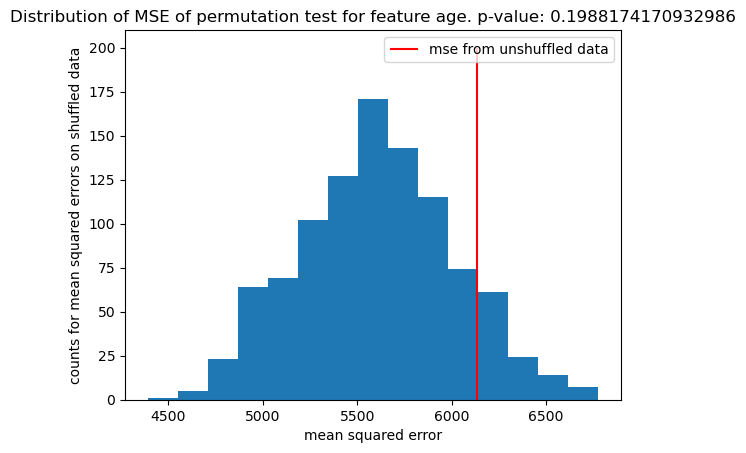

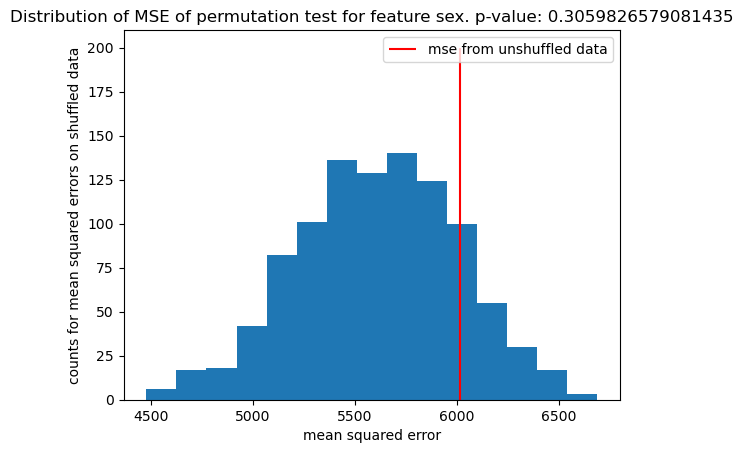

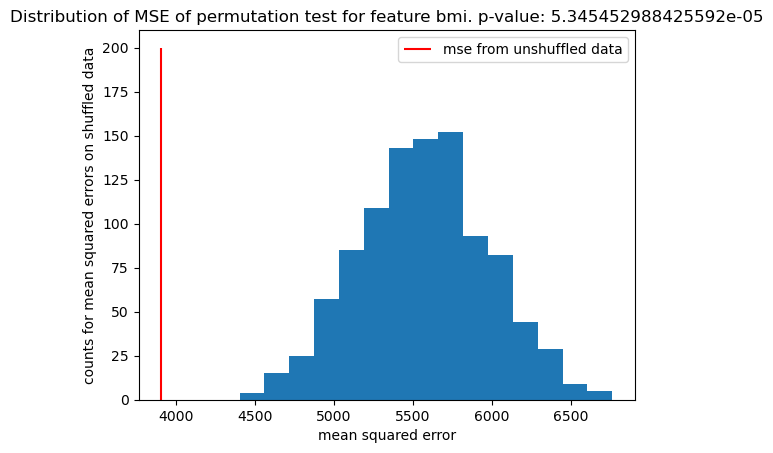

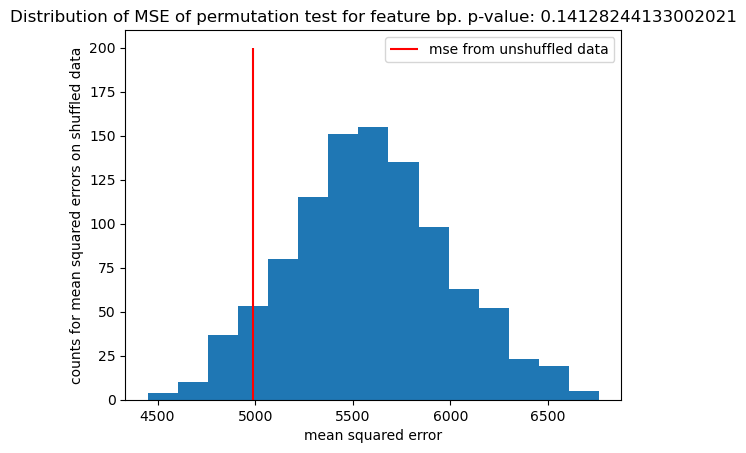

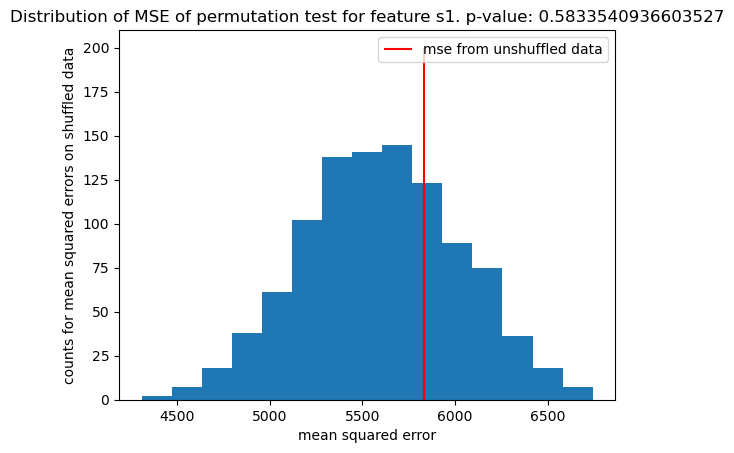

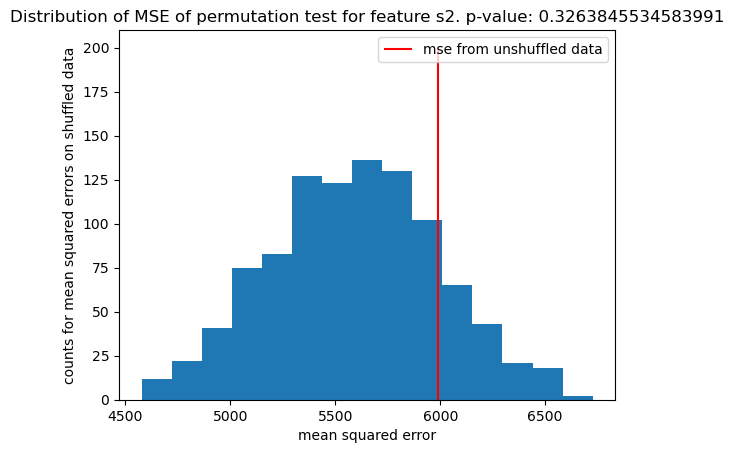

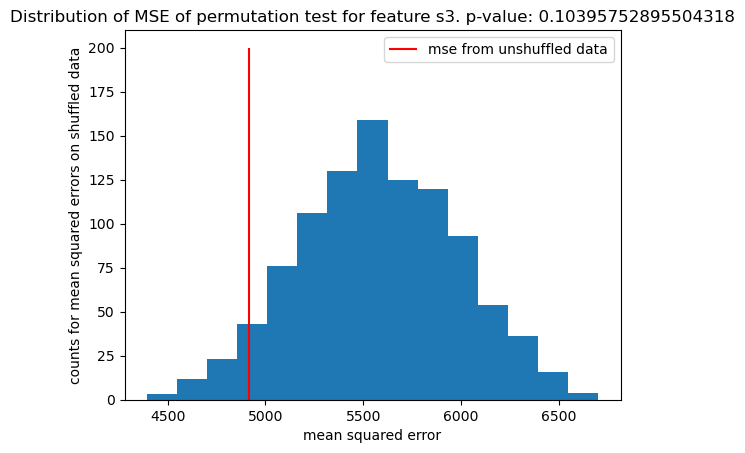

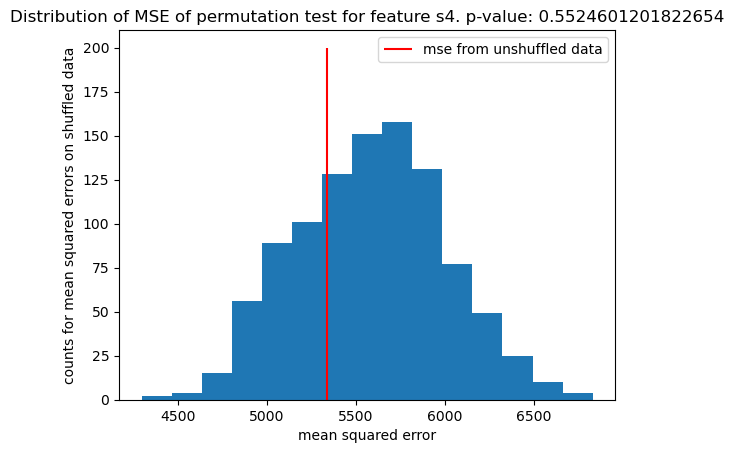

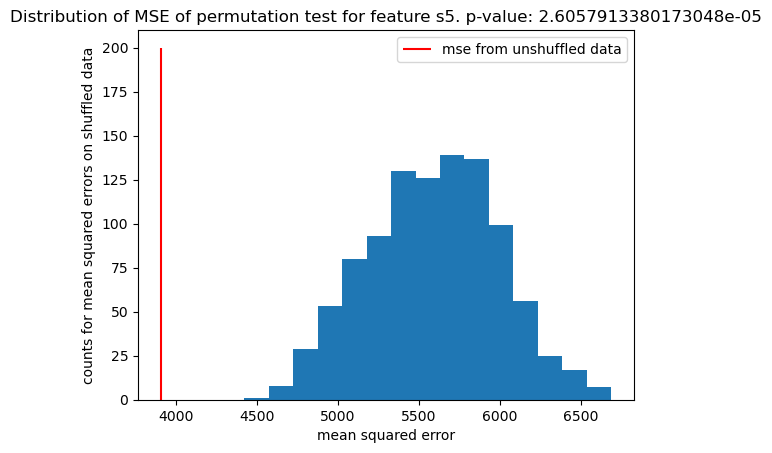

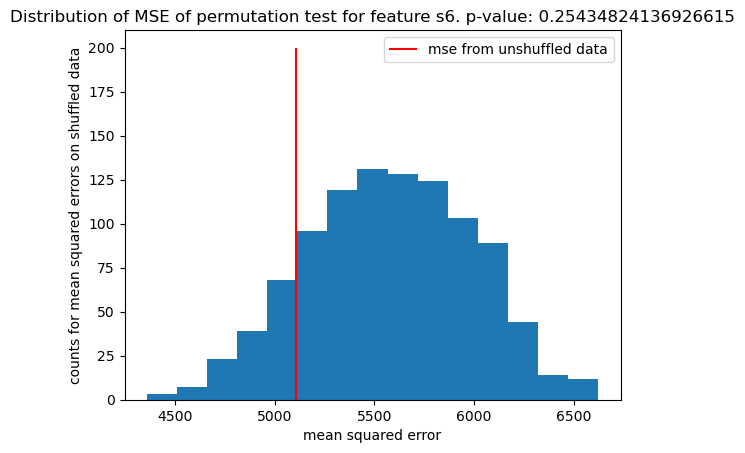

In [73]:

for i,feature in enumerate(data['feature_names']):

    # get features
    diabetes_X = Diabetes_X[:, np.newaxis, i]
    X_train, X_test, y_train, y_test = train_test_split(diabetes_X, Diabetes_y, test_size=0.3)

    # fit linearRegressor
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    perm_scores = []

    for _ in np.arange(0, 1000):

        # Shuffle the labels
        np.random.shuffle(diabetes_y_pred)

        # Calculate the MSE
        mse_perm = mean_squared_error(diabetes_y_pred, diabetes_y_test)

        # Append the MSE to perm_scores
        perm_scores.append(mse_perm)


    mean = np.mean(perm_scores)
    std = np.std(perm_scores)
    t_hat = abs(mean - mse) / std
    p_val = 2*(1 - norm.cdf(t_hat))

    plt.vlines(mse, ymin=0, ymax=200, colors=['r'], label='mse from unshuffled data')
    plt.hist(perm_scores, bins=15)
    plt.ylabel('counts for mean squared errors on shuffled data')
    plt.xlabel('mean squared error')
    plt.title(f'Distribution of MSE of permutation test for feature {feature}. p-value: {p_val}')
    plt.legend()
    plt.show()


